## Decision Tree Regrressor

In [19]:
# Step 0: Import Necessary Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error
from statsmodels.tsa.seasonal import seasonal_decompose
import yfinance as yf

In [3]:
# Step 1: Data Collection

ticker_symbol = 'AAPL'
start_date = '2020-01-01'
end_date = '2021-03-1'


df = yf.download(ticker_symbol, start=start_date, end=end_date)

[*********************100%%**********************]  1 of 1 completed


In [4]:
# Step 2: Exploratory Data Analysis (EDA)
# Data Overview

print("Data shape:", df.shape)


Data shape: (291, 6)


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 291 entries, 2020-01-02 to 2021-02-26
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       291 non-null    float64
 1   High       291 non-null    float64
 2   Low        291 non-null    float64
 3   Close      291 non-null    float64
 4   Adj Close  291 non-null    float64
 5   Volume     291 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 15.9 KB


In [6]:
print(df.describe())

             Open        High         Low       Close   Adj Close  \
count  291.000000  291.000000  291.000000  291.000000  291.000000   
mean   100.137698  101.546486   98.684527  100.170481   98.057737   
std     24.146867   24.227884   23.670557   23.925393   23.657540   
min     57.020000   57.125000   53.152500   56.092499   54.707001   
25%     78.651249   79.614998   77.904999   78.746250   76.842182   
50%     99.172501   99.955002   96.742500   98.357498   96.187706   
75%    120.430000  122.810001  118.884998  120.919998  118.465687   
max    143.600006  145.089996  141.369995  143.160004  140.496246   

             Volume  
count  2.910000e+02  
mean   1.509896e+08  
std    6.813759e+07  
min    4.669130e+07  
25%    1.041180e+08  
50%    1.338384e+08  
75%    1.772322e+08  
max    4.265100e+08  


In [7]:
# Missing Values

print(df.isnull().sum())

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


In [8]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,74.059998,75.150002,73.797501,75.087502,73.059433,135480400
2020-01-03,74.287498,75.144997,74.125000,74.357498,72.349136,146322800
2020-01-06,73.447502,74.989998,73.187500,74.949997,72.925629,118387200
2020-01-07,74.959999,75.224998,74.370003,74.597504,72.582649,108872000
2020-01-08,74.290001,76.110001,74.290001,75.797501,73.750259,132079200


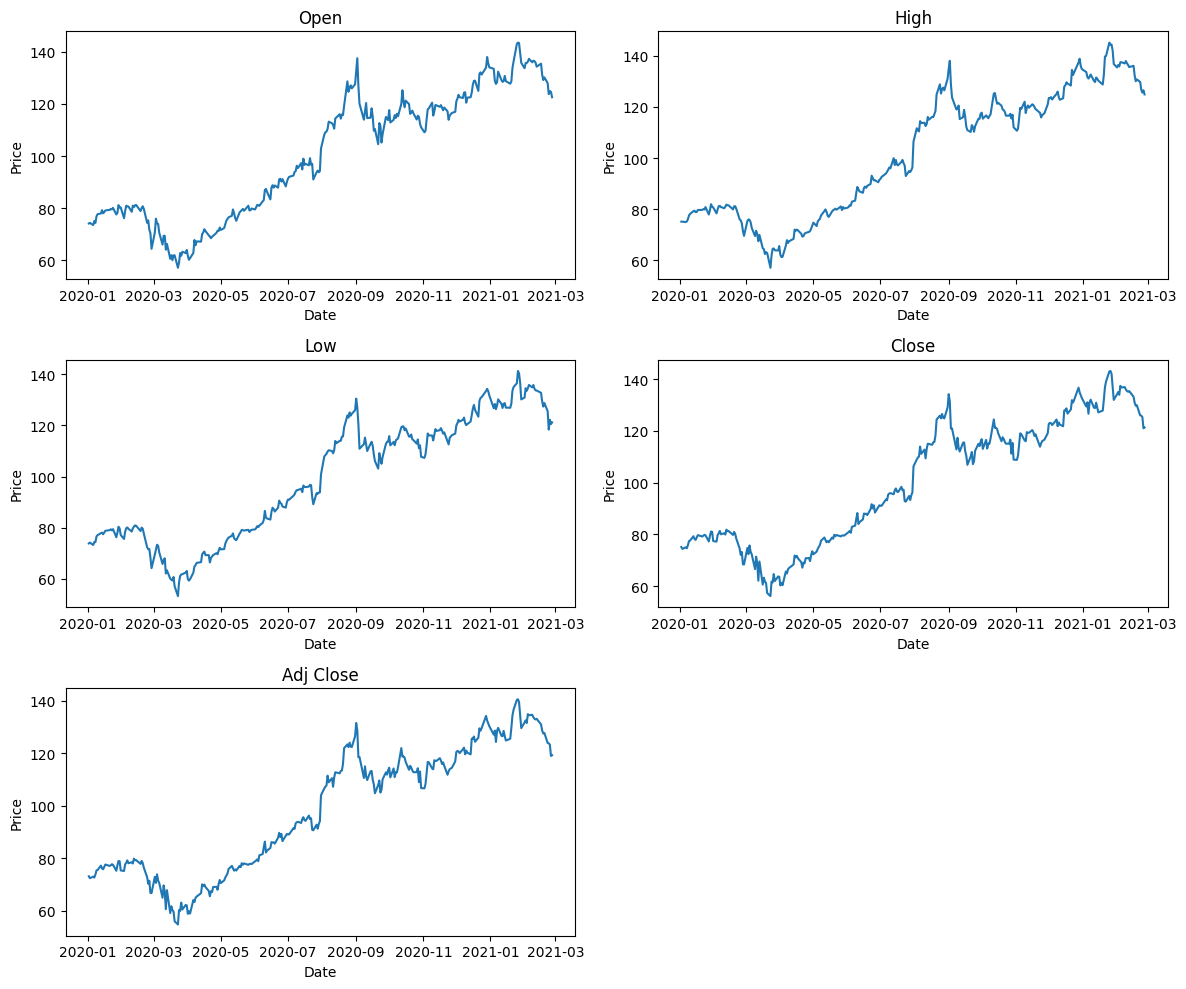

In [9]:
# Loading the data

data = df 

plt.figure(figsize=(12, 10))

# Plotting Open
plt.subplot(3, 2, 1)  # 3 rows, 2 columns, subplot 1
plt.plot(data['Open'])
plt.title('Open')
plt.xlabel('Date')
plt.ylabel('Price')

# Plotting High
plt.subplot(3, 2, 2)  # 3 rows, 2 columns, subplot 2
plt.plot(data['High'])
plt.title('High')
plt.xlabel('Date')
plt.ylabel('Price')

# Plotting Low
plt.subplot(3, 2, 3)  # 3 rows, 2 columns, subplot 3
plt.plot(data['Low'])
plt.title('Low')
plt.xlabel('Date')
plt.ylabel('Price')

# Plotting Close
plt.subplot(3, 2, 4)  # 3 rows, 2 columns, subplot 4
plt.plot(data['Close'])
plt.title('Close')
plt.xlabel('Date')
plt.ylabel('Price')

# Plotting Adj Close
plt.subplot(3, 2, 5)  # 3 rows, 2 columns, subplot 5
plt.plot(data['Adj Close'])
plt.title('Adj Close')
plt.xlabel('Date')
plt.ylabel('Price')

plt.tight_layout()
plt.show()

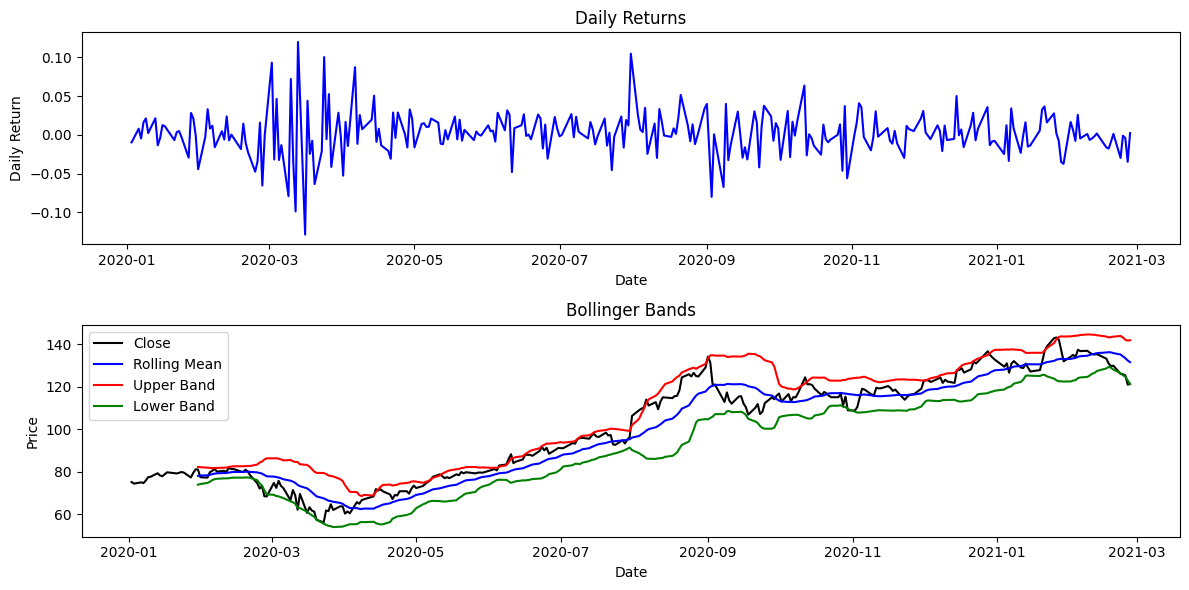

Volatility (Standard Deviation of Daily Returns): 0.028352855217383108


In [10]:
# Volatality Analysis

# Load the data
data = df

# Calculate daily returns
data['Daily Returns'] = data['Close'].pct_change()

# Calculate standard deviation of daily returns (volatility)
volatility = data['Daily Returns'].std()

# Calculate Bollinger Bands
window = 20  
data['Rolling Mean'] = data['Close'].rolling(window).mean()
data['Upper Band'] = data['Rolling Mean'] + 2 * data['Close'].rolling(window).std()
data['Lower Band'] = data['Rolling Mean'] - 2 * data['Close'].rolling(window).std()

# Plotting
plt.figure(figsize=(12, 6))

# Daily Returns
plt.subplot(2, 1, 1)
plt.plot(data.index, data['Daily Returns'], color='blue')
plt.title('Daily Returns')
plt.xlabel('Date')
plt.ylabel('Daily Return')

# Bollinger Bands
plt.subplot(2, 1, 2)
plt.plot(data.index, data['Close'], color='black', label='Close')
plt.plot(data.index, data['Rolling Mean'], color='blue', label='Rolling Mean')
plt.plot(data.index, data['Upper Band'], color='red', label='Upper Band')
plt.plot(data.index, data['Lower Band'], color='green', label='Lower Band')
plt.title('Bollinger Bands')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()

plt.tight_layout()
plt.show()

# Print volatility
print("Volatility (Standard Deviation of Daily Returns):", volatility)


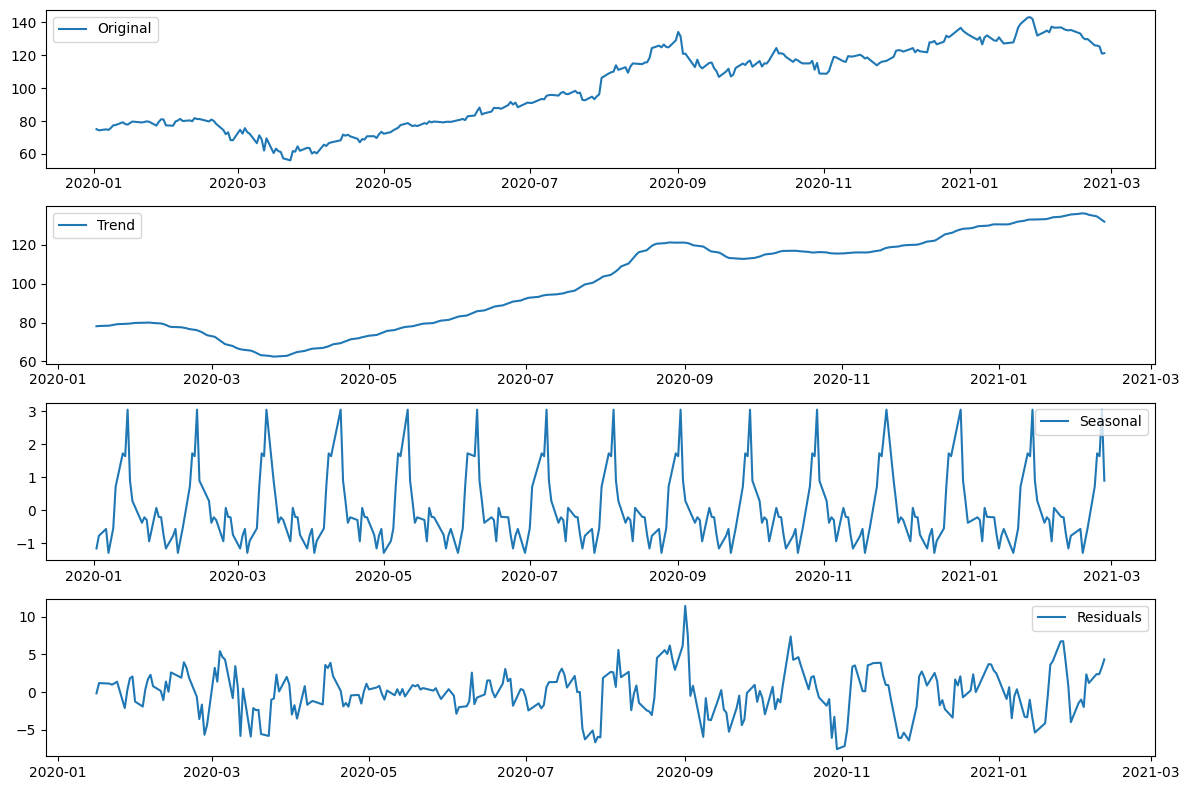

In [11]:
# Seasonal Decomposition

# Load the data
data = df


# Perform seasonal decomposition with adjusted period (e.g., 20 for monthly seasonality)
result = seasonal_decompose(data['Close'], model='additive', period=20)


# Plot the decomposition
plt.figure(figsize=(12, 8))

plt.subplot(4, 1, 1)
plt.plot(data['Close'], label='Original')
plt.legend()

plt.subplot(4, 1, 2)
plt.plot(result.trend, label='Trend')
plt.legend()

plt.subplot(4, 1, 3)
plt.plot(result.seasonal, label='Seasonal')
plt.legend()

plt.subplot(4, 1, 4)
plt.plot(result.resid, label='Residuals')
plt.legend()

plt.tight_layout()
plt.show()


In [12]:
# Calculate summary statistics
summary_stats = data.describe()

# Print the summary statistics
print(summary_stats)

             Open        High         Low       Close   Adj Close  \
count  291.000000  291.000000  291.000000  291.000000  291.000000   
mean   100.137698  101.546486   98.684527  100.170481   98.057737   
std     24.146867   24.227884   23.670557   23.925393   23.657540   
min     57.020000   57.125000   53.152500   56.092499   54.707001   
25%     78.651249   79.614998   77.904999   78.746250   76.842182   
50%     99.172501   99.955002   96.742500   98.357498   96.187706   
75%    120.430000  122.810001  118.884998  120.919998  118.465687   
max    143.600006  145.089996  141.369995  143.160004  140.496246   

             Volume  Daily Returns  Rolling Mean  Upper Band  Lower Band  
count  2.910000e+02     290.000000    272.000000  272.000000  272.000000  
mean   1.509896e+08       0.002055     99.972958  108.182883   91.763034  
std    6.813759e+07       0.028353     23.329267   24.549061   22.577943  
min    4.669130e+07      -0.128647     62.365375   68.442952   53.878378  
25%

In [13]:
# Step 3: Data Preprocessing
df['MA5'] = df['Close'].rolling(window=5).mean()
df['MA10'] = df['Close'].rolling(window=10).mean()
df = df.dropna() # Remove NaN values created by moving averages

# Splitting the dataset manually
train_df = df.loc['2020-01-01':'2021-01-01']
test_df = df.loc['2021-01-02':'2021-02-01']
validation_df = df.loc['2021-02-02':'2021-03-01']

# Prepare features and target for each set (assuming you're predicting Close prices using the same features)
X_train = train_df[['Open', 'High', 'Low', 'MA5', 'MA10']]
y_train = train_df['Close']

X_test = test_df[['Open', 'High', 'Low', 'MA5', 'MA10']]
y_test = test_df['Close']

X_validation = validation_df[['Open', 'High', 'Low', 'MA5', 'MA10']]
y_validation = validation_df['Close']

In [14]:
# Step 4: Model Training
decision_tree_model = DecisionTreeRegressor()
decision_tree_model.fit(X_train, y_train)

# Predictions
y_pred = decision_tree_model.predict(X_test)

In [15]:
print(y_pred)

[131.3999939  130.96000671 130.96000671 130.96000671 130.96000671
 130.96000671 130.96000671 130.96000671 130.96000671 130.96000671
 127.80999756 130.96000671 136.69000244 136.69000244 134.86999512
 134.86999512 134.86999512 134.86999512 134.17999268 134.17999268]


In [16]:
print(y_test)

Date
2021-01-04    129.410004
2021-01-05    131.009995
2021-01-06    126.599998
2021-01-07    130.919998
2021-01-08    132.050003
2021-01-11    128.979996
2021-01-12    128.800003
2021-01-13    130.889999
2021-01-14    128.910004
2021-01-15    127.139999
2021-01-19    127.830002
2021-01-20    132.029999
2021-01-21    136.869995
2021-01-22    139.070007
2021-01-25    142.919998
2021-01-26    143.160004
2021-01-27    142.059998
2021-01-28    137.089996
2021-01-29    131.960007
2021-02-01    134.139999
Name: Close, dtype: float64


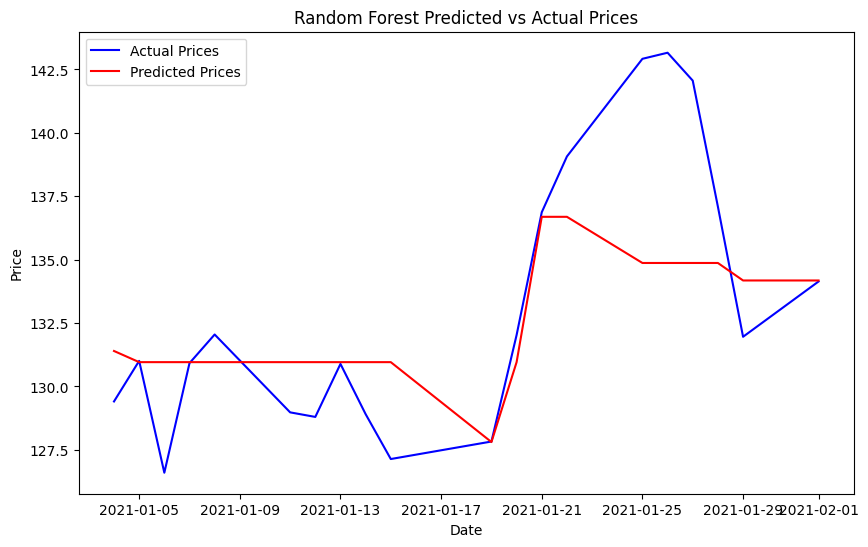

In [21]:
# Visualize Predictions
plt.figure(figsize=(10,6))
plt.plot(y_test.index, y_test, label='Actual Prices', color='blue')
plt.plot(y_test.index, y_pred, label='Predicted Prices', color='red')
plt.title('Random Forest Predicted vs Actual Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [17]:
# Additionally, perform predictions and evaluation on the validation set
y_pred_validation = decision_tree_model.predict(X_validation)
rmse_validation = np.sqrt(mean_squared_error(y_validation, y_pred_validation))
r2_validation = r2_score(y_validation, y_pred_validation)
print(f"Validation RMSE: {rmse_validation}")
print(f"Validation R² score: {r2_validation}")

Validation RMSE: 2.2191849589637487
Validation R² score: 0.8218200836618461


In [20]:
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")

Mean Absolute Error: 2.4635005950927735


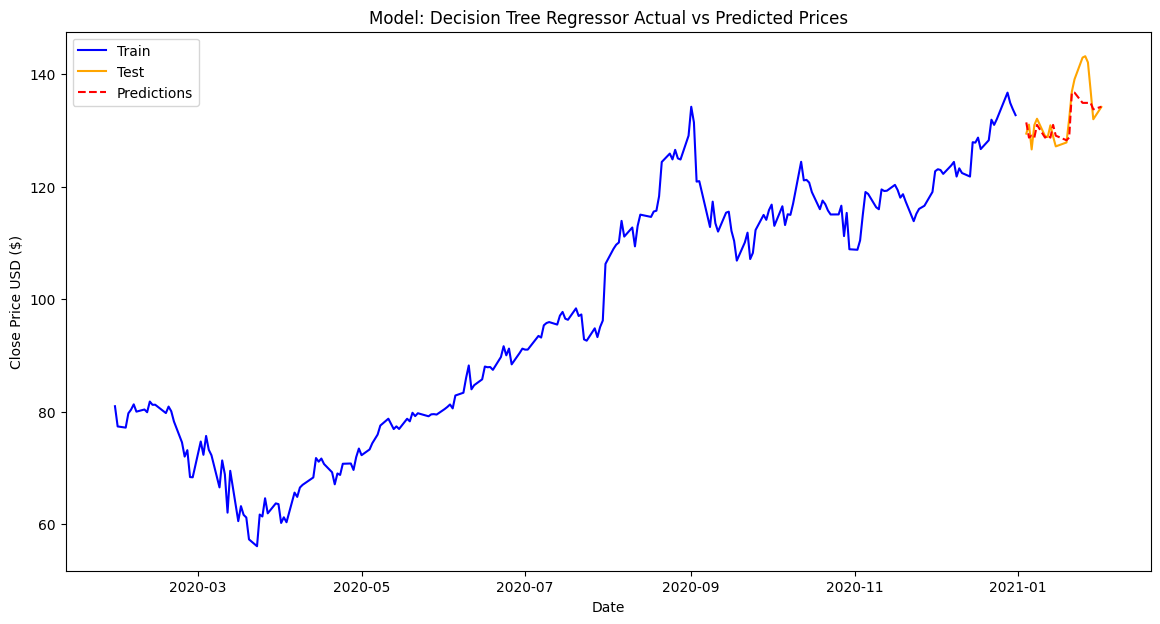

In [21]:
import matplotlib.pyplot as plt

# Plot the actual closing prices for training and test sets
plt.figure(figsize=(14, 7))
plt.plot(train_df.index, train_df['Close'], label='Train', color='blue')
plt.plot(test_df.index, test_df['Close'], label='Test', color='orange')

# Overlay the predicted prices on the test set
plt.plot(test_df.index, y_pred, label='Predictions', color='red', linestyle='--')

# Add title and labels
plt.title('Model: Decision Tree Regressor Actual vs Predicted Prices')
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')

# Show legend
plt.legend()

# Show the plot
plt.show()


## Randomforest

In [71]:
# Step 0: Import Necessary Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import yfinance as yf


In [72]:

# Step 1: Data Collection
ticker_symbol = 'AAPL'
start_date = '2020-01-01'
end_date = '2021-03-1'


df = yf.download(ticker_symbol, start=start_date, end=end_date)

[*********************100%%**********************]  1 of 1 completed


In [73]:

# Step 2: Exploratory Data Analysis (EDA)
# Data Overview
print("Data shape:", df.shape)


Data shape: (291, 6)


In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 291 entries, 2020-01-02 to 2021-02-26
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       291 non-null    float64
 1   High       291 non-null    float64
 2   Low        291 non-null    float64
 3   Close      291 non-null    float64
 4   Adj Close  291 non-null    float64
 5   Volume     291 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 15.9 KB


In [75]:

print(df.describe())

             Open        High         Low       Close   Adj Close  \
count  291.000000  291.000000  291.000000  291.000000  291.000000   
mean   100.137698  101.546486   98.684527  100.170481   98.057738   
std     24.146867   24.227884   23.670557   23.925393   23.657541   
min     57.020000   57.125000   53.152500   56.092499   54.706993   
25%     78.651249   79.614998   77.904999   78.746250   76.842182   
50%     99.172501   99.955002   96.742500   98.357498   96.187714   
75%    120.430000  122.810001  118.884998  120.919998  118.465691   
max    143.600006  145.089996  141.369995  143.160004  140.496277   

             Volume  
count  2.910000e+02  
mean   1.509896e+08  
std    6.813759e+07  
min    4.669130e+07  
25%    1.041180e+08  
50%    1.338384e+08  
75%    1.772322e+08  
max    4.265100e+08  


In [76]:
# Missing Values
print(df.isnull().sum())

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


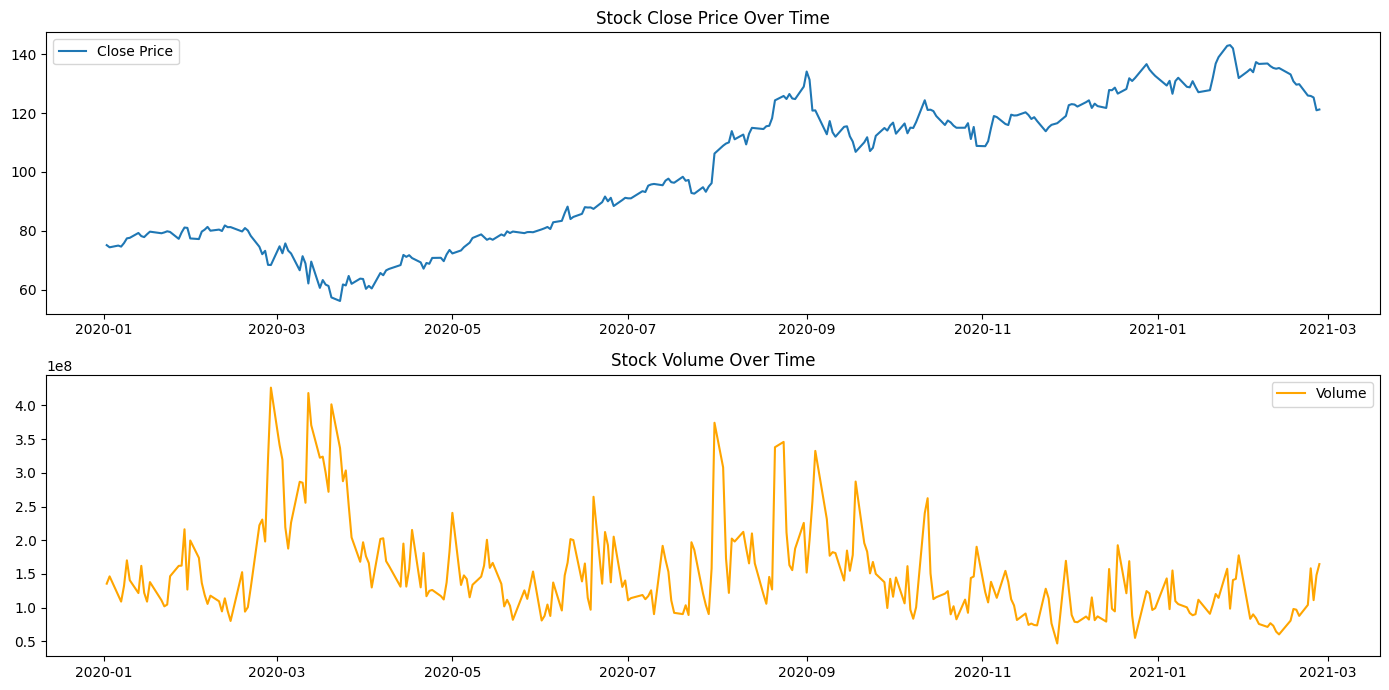

In [77]:
# Visualizing Stock Price Trends
plt.figure(figsize=(14, 7))
plt.subplot(2, 1, 1)
plt.plot(df['Close'], label='Close Price')
plt.title('Stock Close Price Over Time')
plt.legend()
plt.subplot(2, 1, 2)
plt.plot(df['Volume'], label='Volume', color='orange')
plt.title('Stock Volume Over Time')
plt.legend()
plt.tight_layout()
plt.show()

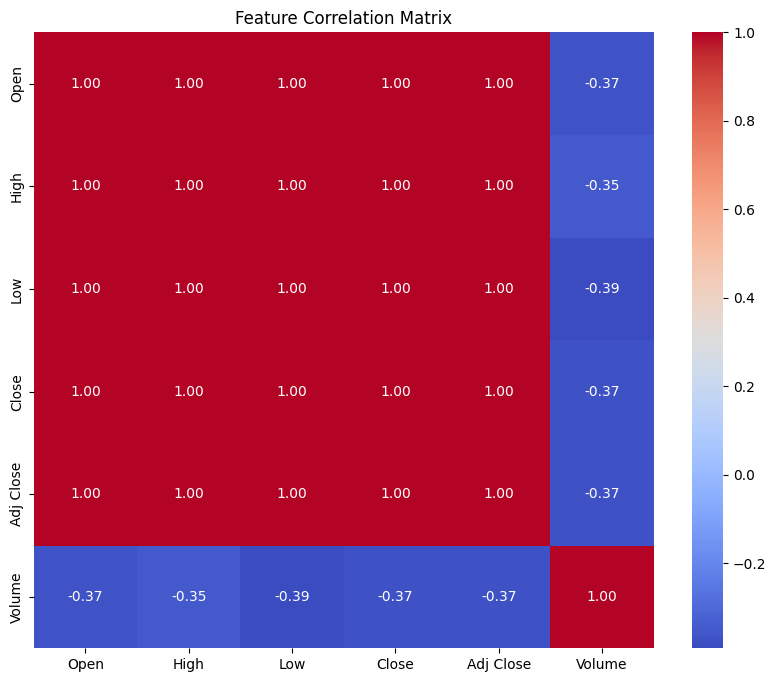

In [78]:
# Correlation Analysis
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Feature Correlation Matrix')
plt.show()

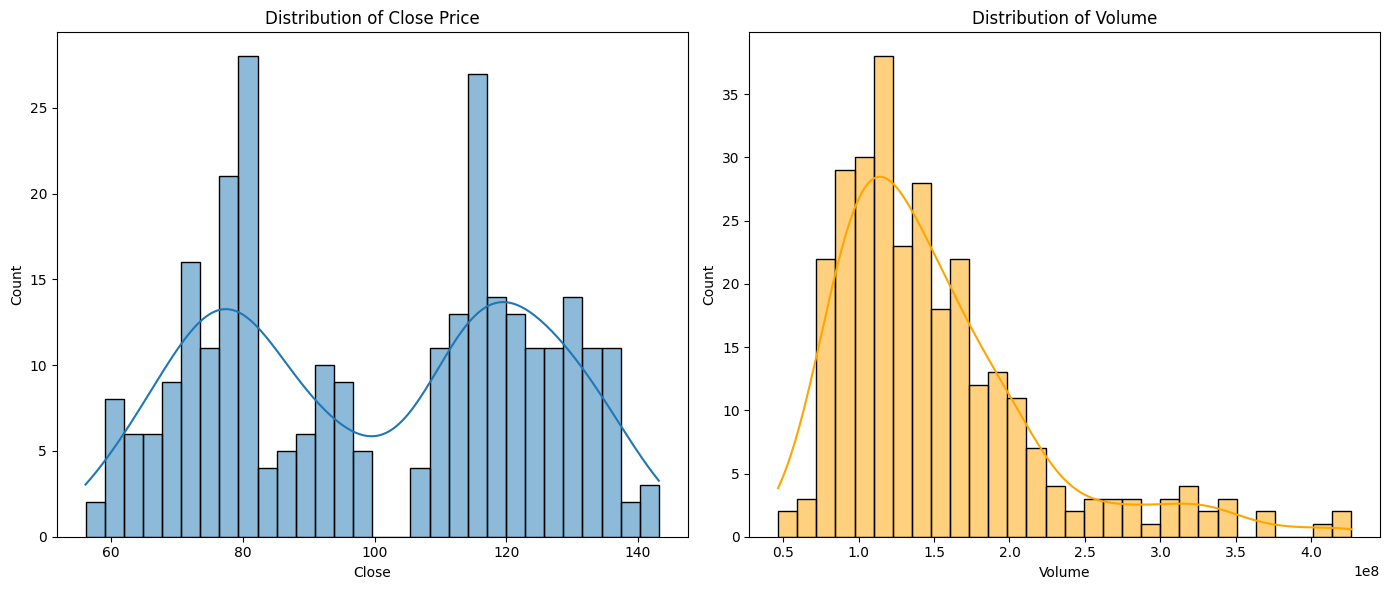

In [79]:
# Distribution of Features
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.histplot(df['Close'], bins=30, kde=True)
plt.title('Distribution of Close Price')
plt.subplot(1, 2, 2)
sns.histplot(df['Volume'], bins=30, color='orange', kde=True)
plt.title('Distribution of Volume')
plt.tight_layout()
plt.show()

In [80]:
# Step 3: Data Preprocessing
df['MA5'] = df['Close'].rolling(window=5).mean()
df['MA10'] = df['Close'].rolling(window=10).mean()
df = df.dropna() # Remove NaN values created by moving averages

# Splitting the dataset manually
train_df = df.loc['2020-01-01':'2021-01-01']
test_df = df.loc['2021-01-02':'2021-02-01']
validation_df = df.loc['2021-02-02':'2021-03-01']

# Prepare features and target for each set (assuming you're predicting Close prices using the same features)
X_train = train_df[['Open', 'High', 'Low', 'MA5', 'MA10']]
y_train = train_df['Close']

X_test = test_df[['Open', 'High', 'Low', 'MA5', 'MA10']]
y_test = test_df['Close']

X_validation = validation_df[['Open', 'High', 'Low', 'MA5', 'MA10']]
y_validation = validation_df['Close']

In [81]:

# Step 4: Model Training
random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42)
random_forest_model.fit(X_train, y_train)

# Predictions
y_pred = random_forest_model.predict(X_test)


In [86]:
print(y_pred)

[131.59732567 131.08380112 130.1110244  130.64559998 131.82370392
 130.12940094 129.67372475 130.77320023 131.00510193 130.05012444
 128.73999924 130.88500137 135.34189972 134.98099792 134.77959778
 134.77959778 134.77959778 134.77959778 133.36780151 132.98520096]


In [91]:
print(y_test)

Date
2021-01-04    129.410004
2021-01-05    131.009995
2021-01-06    126.599998
2021-01-07    130.919998
2021-01-08    132.050003
2021-01-11    128.979996
2021-01-12    128.800003
2021-01-13    130.889999
2021-01-14    128.910004
2021-01-15    127.139999
2021-01-19    127.830002
2021-01-20    132.029999
2021-01-21    136.869995
2021-01-22    139.070007
2021-01-25    142.919998
2021-01-26    143.160004
2021-01-27    142.059998
2021-01-28    137.089996
2021-01-29    131.960007
2021-02-01    134.139999
Name: Close, dtype: float64


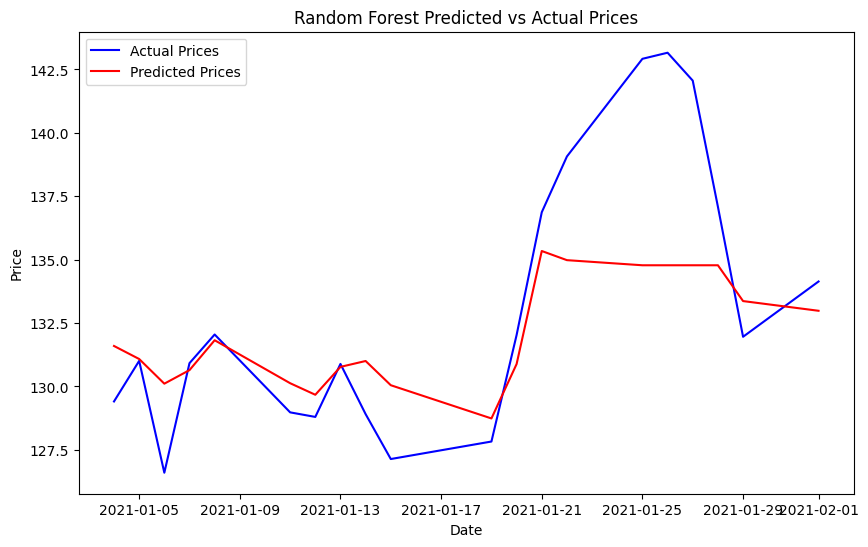

In [85]:
# Optional: Visualize Predictions
plt.figure(figsize=(10,6))
plt.plot(y_test.index, y_test, label='Actual Prices', color='blue')
plt.plot(y_test.index, y_pred, label='Predicted Prices', color='red')
plt.title('Random Forest Predicted vs Actual Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [82]:

# Step 5: Model Evaluation
# Additionally, perform predictions and evaluation on the validation set
y_pred_validation = random_forest_model.predict(X_validation)
rmse_validation = np.sqrt(mean_squared_error(y_validation, y_pred_validation))
r2_validation = r2_score(y_validation, y_pred_validation)
print(f"Validation RMSE: {rmse_validation}")
print(f"Validation R² score: {r2_validation}")

Validation RMSE: 1.8412738785451093
Validation R² score: 0.8773384257031247


In [84]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")

Mean Absolute Error: 2.4882149353027345


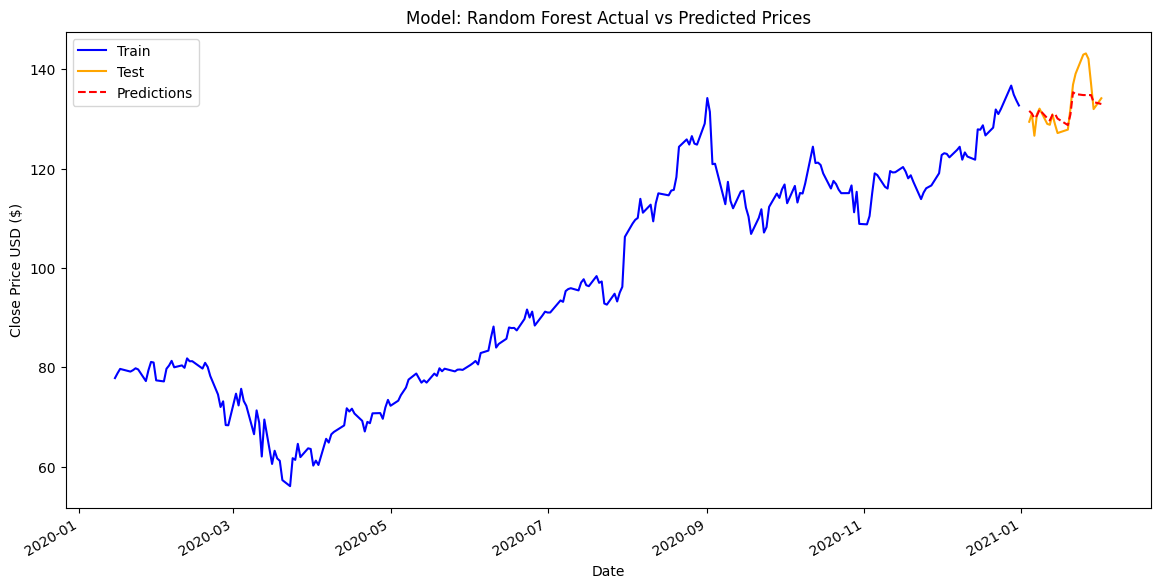

In [17]:
import matplotlib.pyplot as plt



# Plot the actual closing prices for the training set, the test set, and overlay the predictions
plt.figure(figsize=(14, 7))  # Set the size of the plot
plt.plot(train_df.index, train_df['Close'], label='Train', color='blue')  # Training data in blue
plt.plot(test_df.index, test_df['Close'], label='Test', color='orange')  # Test data in orange
plt.plot(test_df.index, y_pred, label='Predictions', color='red', linestyle='--')  # Predictions in red dashed line

# Add title and labels
plt.title('Model: Random Forest Actual vs Predicted Prices')
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')

# Show legend
plt.legend()

# Optionally, you can format the x-axis to show dates better
plt.gcf().autofmt_xdate()  # Rotate the dates for better spacing

# Show the plot
plt.show()


In [ ]:
import nbformat

# List of notebook files to merge
notebooks_to_merge = ['DecisionTree.ipynb', 'randomforest.ipynb', 'XGboost.ipynb', 'LSTM.ipynb']

# Initialize an empty notebook
merged_notebook = nbformat.v4.new_notebook()

# Merge the notebooks
for nb_name in notebooks_to_merge:
    with open(nb_name, 'r', encoding='utf-8') as f:
        nb = nbformat.read(f, as_version=4)
        # If you want to add a separator or title between notebooks, do it here
        # For example, to add a Markdown cell with the notebook name:
        # merged_notebook.cells.append(nbformat.v4.new_markdown_cell(f"# {nb_name}"))
        merged_notebook.cells.extend(nb.cells)

# Save the merged notebook
with open('FinalProjectDMT.ipynb', 'w', encoding='utf-8') as f:
    nbformat.write(merged_notebook, f)

print('Notebooks merged into FinalProjectDMT.ipynb')


In [1]:
## 1. Download Apple Stock Data using yfinance
import yfinance as yf

ticker_symbol = 'AAPL'
start_date = '2020-01-01'
end_date = '2021-03-1'

# Download the stock data
df = yf.download(ticker_symbol, start=start_date, end=end_date)

[*********************100%%**********************]  1 of 1 completed


In [24]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,74.059998,75.150002,73.797501,75.087502,73.059418,135480400
2020-01-03,74.287498,75.144997,74.125000,74.357498,72.349129,146322800
2020-01-06,73.447502,74.989998,73.187500,74.949997,72.925613,118387200
2020-01-07,74.959999,75.224998,74.370003,74.597504,72.582657,108872000
2020-01-08,74.290001,76.110001,74.290001,75.797501,73.750252,132079200


/var/folders/jv/4lsywf1j2nz9qm0vrw3zhvh80000gp/T/ipykernel_29231/3610284954.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Close'], bins=30)


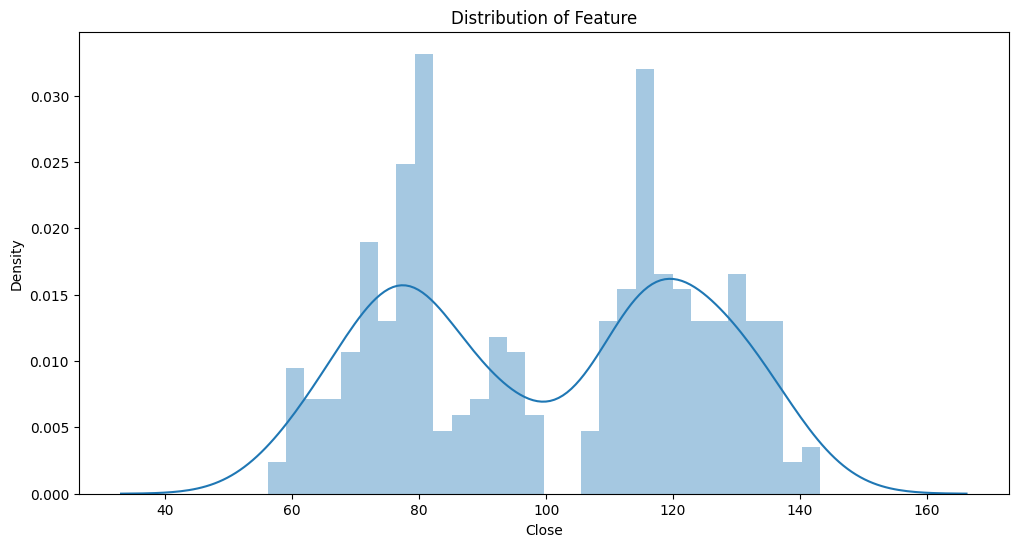

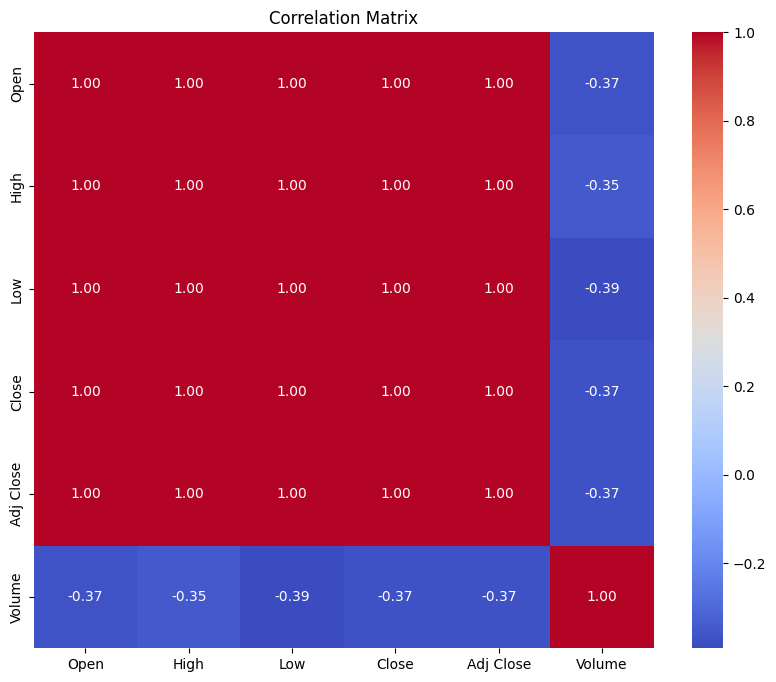

In [8]:

## Exploratory Data Analysis (EDA)

# Plotting the distribution of features
plt.figure(figsize=(12, 6))
sns.distplot(df['Close'], bins=30)
plt.title('Distribution of Feature')
plt.show()

# Correlation matrix heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


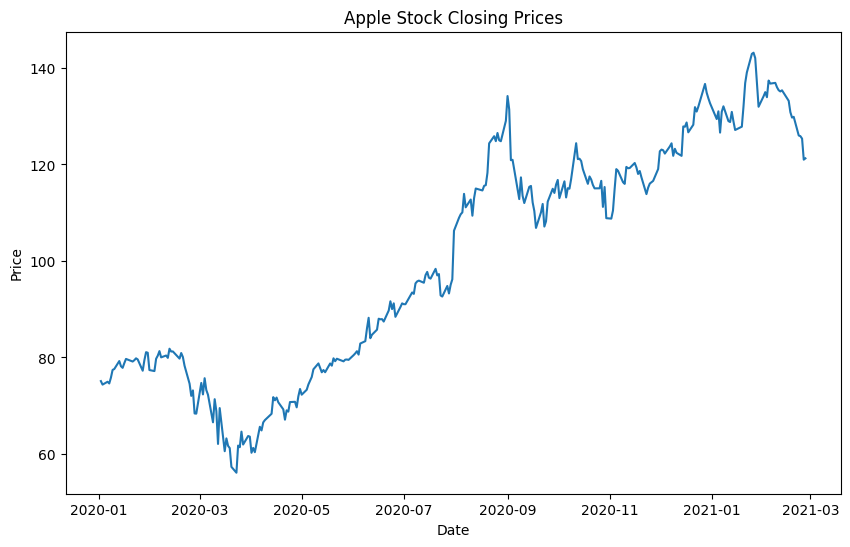

             Open        High         Low       Close   Adj Close  \
count  291.000000  291.000000  291.000000  291.000000  291.000000   
mean   100.137698  101.546486   98.684527  100.170481   98.057737   
std     24.146867   24.227884   23.670557   23.925393   23.657540   
min     57.020000   57.125000   53.152500   56.092499   54.706989   
25%     78.651249   79.614998   77.904999   78.746250   76.842175   
50%     99.172501   99.955002   96.742500   98.357498   96.187714   
75%    120.430000  122.810001  118.884998  120.919998  118.465679   
max    143.600006  145.089996  141.369995  143.160004  140.496277   

             Volume  
count  2.910000e+02  
mean   1.509896e+08  
std    6.813759e+07  
min    4.669130e+07  
25%    1.041180e+08  
50%    1.338384e+08  
75%    1.772322e+08  
max    4.265100e+08  


In [5]:

## 2. Perform Exploratory Data Analysis (EDA)
import matplotlib.pyplot as plt
import seaborn as sns

# Plot closing prices
plt.figure(figsize=(10, 6))
plt.plot(df['Close'])
plt.title('Apple Stock Closing Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

# Display basic statistics
print(df.describe())


In [20]:
# Manual split based on the specific date ranges
train_df = df.loc['2020-01-01':'2021-01-01']
test_df = df.loc['2021-01-02':'2021-02-01']
# Validation set, in case you need it later
validation_df = df.loc['2021-02-02':'2021-03-01']

# training based on close price
X_train = train_df[['Close']]
y_train = train_df['Close'].shift(-1) # Predict next day's close for the training set
X_train = X_train[:-1] # Remove last row which has no next day's close for the training set
y_train = y_train.dropna() # Remove last NA value from the training set

X_test = test_df[['Close']]
y_test = test_df['Close'].shift(-1) # Predict next day's close for the test set
X_test = X_test[:-1] # Remove last row which has no next day's close for the test set
y_test = y_test.dropna() # Remove last NA value from the test set

In [26]:
# Ensure that 'df' is sorted by date if it's not already
df = df.sort_index()

# Define your date ranges for training and testing
train_start, train_end = '2020-01-01', '2021-01-01'
test_start, test_end = '2021-01-02', '2021-02-01'
validation_start, validation_end = '2021-02-02', '2021-03-01'

train_df = df.loc[train_start:train_end].copy()
test_df = df.loc[test_start:test_end].copy()
validation_df = df.loc[validation_start:validation_end].copy()

# Feature and target creation
# Using 'Close' price for today to predict 'Close' price for the next day
# Shift creates a new column where each value is the 'Close' price of the next day
train_df['Target'] = train_df['Close'].shift(-1)
test_df['Target'] = test_df['Close'].shift(-1)
validation_df['Target'] = validation_df['Close'].shift(-1)


# Drop the last row in each set because it does not have a next day 'Close' price
train_df = train_df.iloc[:-1]
test_df = test_df.iloc[:-1]
validation_df = validation_df.iloc[:-1]

# Define features and labels for training and testing
X_train, y_train = train_df[['Close']], train_df['Target']
X_test, y_test = test_df[['Close']], test_df['Target']
X_validation, y_validation = validation_df[['Close']], validation_df['Target']


In [27]:
## 4. Train an XGBoost Model
import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Train XGBoost model
xgb_model = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 100)

xgb_model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"R^2: {r2}")


RMSE: 3.1489617193865374
MAE: 2.5975602802477384
R^2: 0.6378489630518795


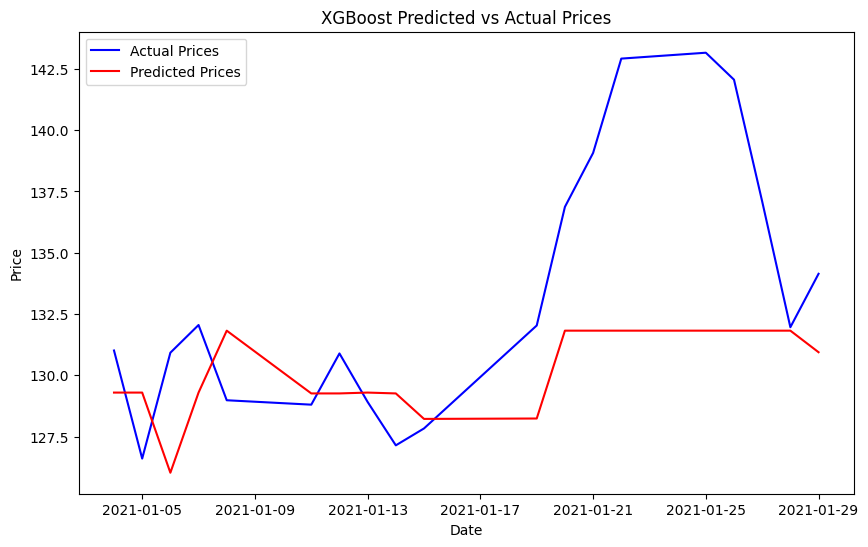

In [28]:
import matplotlib.pyplot as plt

y_pred = xgb_model.predict(X_test)

# Plot actual vs predicted prices
plt.figure(figsize=(10, 6))
plt.plot(y_test.index, y_test, label='Actual Prices', color='blue')
plt.plot(y_test.index, y_pred, label='Predicted Prices', color='red')
plt.title('XGBoost Predicted vs Actual Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


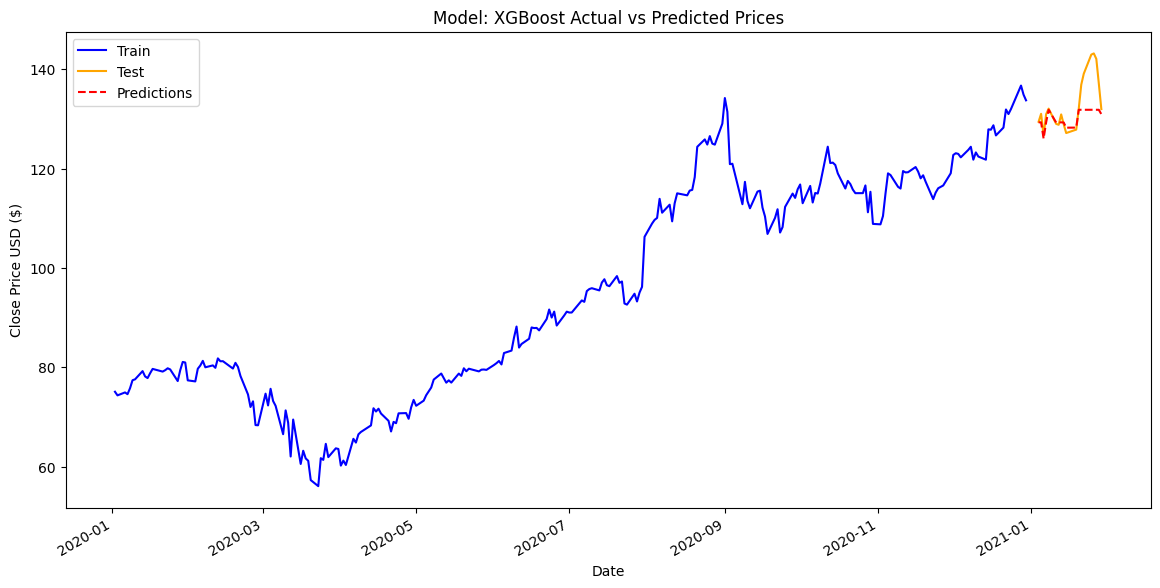

In [17]:
import matplotlib.pyplot as plt

# Plot the actual closing prices for the training set, the test set, and overlay the predictions
plt.figure(figsize=(14, 7))  # Set the size of the plot
plt.plot(train_df.index, train_df['Close'], label='Train', color='blue')  # Training data in blue
plt.plot(test_df.index, test_df['Close'], label='Test', color='orange')  # Test data in orange
plt.plot(test_df.index, y_pred, label='Predictions', color='red', linestyle='--')  # Predictions in red dashed line

# Add title and labels
plt.title('Model: XGBoost Actual vs Predicted Prices')
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')

# Show legend
plt.legend()

# Optionally, you can format the x-axis to show dates better
plt.gcf().autofmt_xdate()  # Rotate the


## LSTM Model

## Import Libraries

In [63]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

from pandas_datareader.data import DataReader
import yfinance as yf
from pandas_datareader import data as pdr
import torch
import torch.nn as nn
from torch.autograd import Variable
import numpy as np
import yfinance as yf
from pandas_datareader import data as pdr
from sklearn import metrics

from datetime import datetime

import warnings

# Disable all warnings
warnings.filterwarnings('ignore')


In [32]:
stock_symbol = 'AAPL'
start_date = '2020-01-01'
end_date = '2021-03-1'

In [33]:
# Extracting the Stock
yf.pdr_override()
df = pdr.get_data_yahoo(stock_symbol, start_date, end_date)
df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,74.059998,75.150002,73.797501,75.087502,73.059425,135480400
2020-01-03,74.287498,75.144997,74.125000,74.357498,72.349129,146322800
2020-01-06,73.447502,74.989998,73.187500,74.949997,72.925652,118387200
2020-01-07,74.959999,75.224998,74.370003,74.597504,72.582649,108872000
2020-01-08,74.290001,76.110001,74.290001,75.797501,73.750259,132079200
...,...,...,...,...,...,...
2021-02-22,128.009995,129.720001,125.599998,126.000000,123.840347,103916400
2021-02-23,123.760002,126.709999,118.389999,125.860001,123.702721,158273000
2021-02-24,124.940002,125.559998,122.230003,125.349998,123.201462,111039900


In [66]:
df.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

## Visualization

In [34]:
# Splitting the dataset manually
train_df = df.loc['2020-01-01':'2021-01-01']
test_df = df.loc['2021-01-02':'2021-02-01']
validation_df = df.loc['2021-02-02':'2021-03-01']

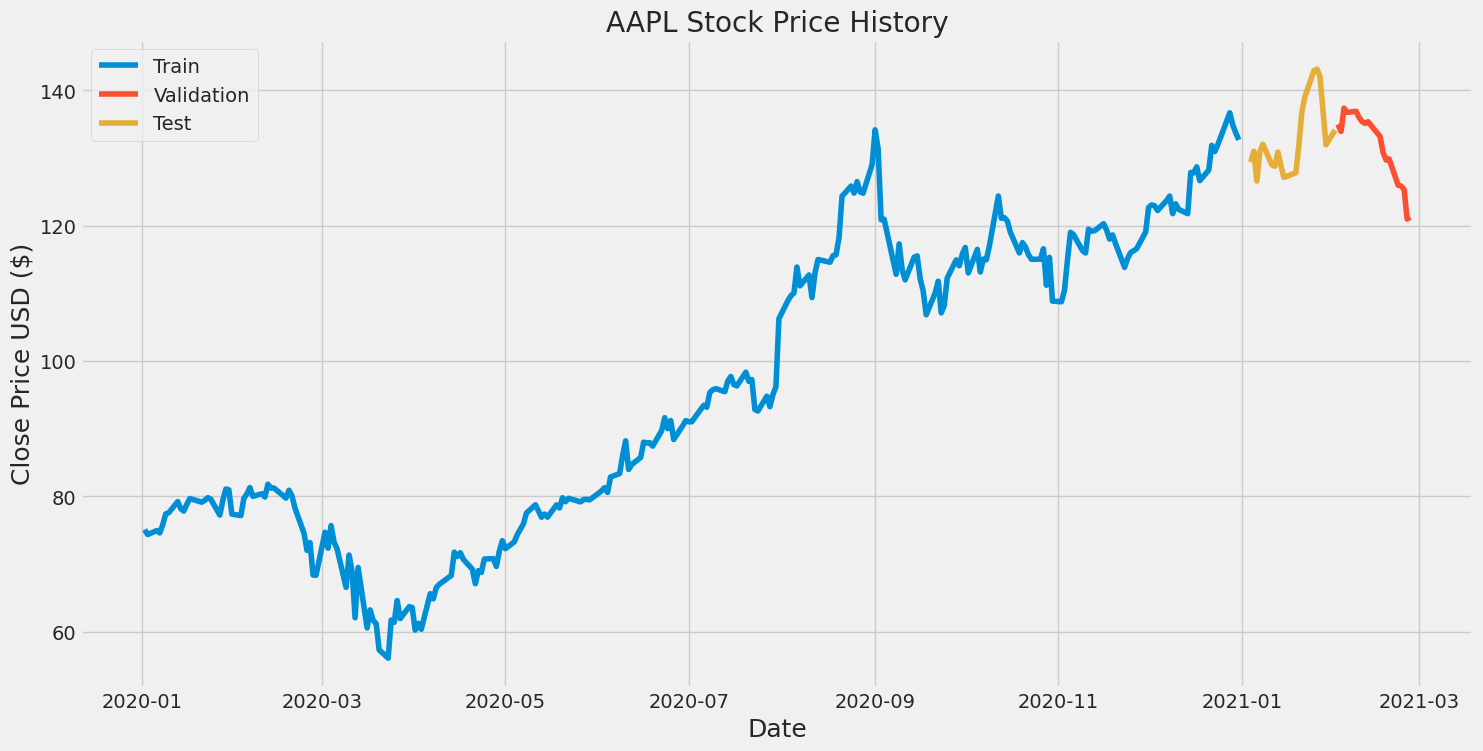

In [65]:
# Plot the entire dataset and mark the train, val and test
plt.figure(figsize=(16,8))
plt.title('AAPL Stock Price History')
plt.plot(train_df['Close'], label='Train')
plt.plot(validation_df['Close'], label='Validation')
plt.plot(test_df['Close'], label='Test')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.legend(loc='upper left')
plt.show()

## Modeling

In [196]:
train_len = train_df.shape[0]

dataset = df.filter(['Close'])

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

In [230]:
train_data = scaled_data[0:int(train_len), :]
# Split the data into x_train and y_train data sets
X_train = []
y_train = []

sequence_length = 30

for i in range(sequence_length, len(train_data)):
    X_train.append(train_data[i-sequence_length:i, 0])
    y_train.append(train_data[i, 0])

# Convert the x_train and y_train to numpy arrays
X_train, y_train = np.array(X_train), np.array(y_train)

# Reshape the data
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

test_data = scaled_data[train_len - sequence_length: , :]

# Create the data sets x_test and y_test
x_test = []
y_test = dataset[train_len:]['Close'].values

for i in range(sequence_length, len(test_data)):
    x_test.append(test_data[i-sequence_length:i, 0])

# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))


print(X_train.shape)
print(x_test.shape)


(223, 30, 1)
(38, 30, 1)


In [231]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

from keras.losses import Huber

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (X_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dropout(0.02))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss=Huber())

# Train the model
model.fit(X_train, y_train, batch_size=1, epochs=3)

Epoch 1/3
223/223 [==============================] - 10s 31ms/step - loss: 0.0136
Epoch 2/3
223/223 [==============================] - 11s 51ms/step - loss: 0.0049
Epoch 3/3
223/223 [==============================] - 5s 24ms/step - loss: 0.0043


## Evaluation

In [235]:
# Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
print("MAE :",metrics.mean_absolute_error(y_test, predictions))
print("RMSE :",metrics.mean_squared_error(y_test, predictions, squared=False))
print("r2 Score :", metrics.r2_score(y_test, predictions))

2/2 [==============================] - 0s 17ms/step
MAE : 3.341293736508018
RMSE : 4.6452901220483875
r2 Score : 0.8261051398785001


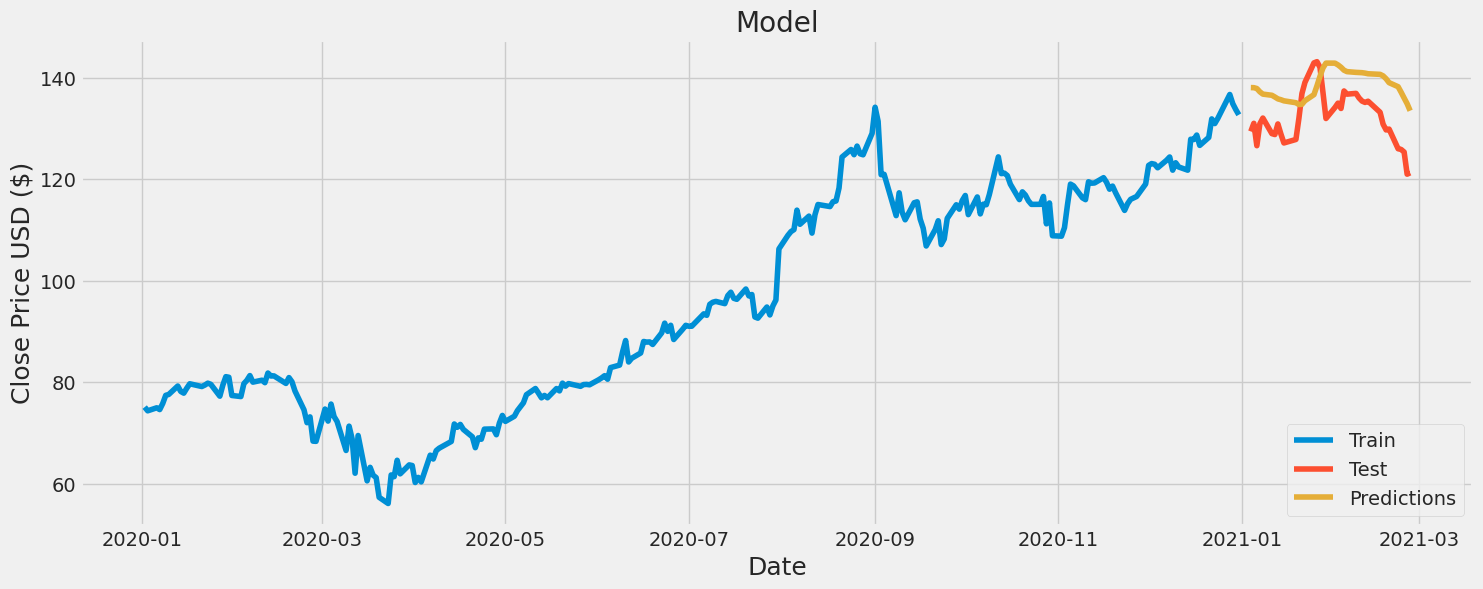

In [222]:
# Plot the data
train = dataset[:train_len]
valid = dataset[train_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Test', 'Predictions'], loc='lower right')
plt.show()


## Modeling with all input

In [192]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Assuming df is your DataFrame containing all columns including 'Open', 'High', 'Low', 'Close', 'Adj Close', and 'Volume'

sequence_length = 7
# Select relevant columns
data = df[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']]

# Convert dataframe to numpy array
dataset = data.values

# Get the number of rows to train the model on
training_data_len = train_len

# Separate the target variable (Close) from features
features = dataset[:, :5]  # Columns 'Open' to 'Adj Close'
target = dataset[:, 3]  # 'Close' column

# Scale the features
feature_scaler = MinMaxScaler(feature_range=(0, 1))
scaled_features = feature_scaler.fit_transform(features)

# Scale the target variable
target_scaler = MinMaxScaler(feature_range=(0, 1))
scaled_target = target_scaler.fit_transform(target.reshape(-1, 1))

# Create the training data set
train_data = scaled_features[0:int(training_data_len), :]
train_target = scaled_target[0:int(training_data_len), :]

# Split the data into x_train and y_train data sets
x_train = []
y_train = []
for i in range(sequence_length, len(train_data)):
    x_train.append(train_data[i-sequence_length:i, :])  # Include all columns for the past 60 days
    y_train.append(train_target[i, 0])  # 'Close' column as the target variable

# Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 5))  # 5 is the number of features

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(x_train.shape[1], 5)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss=Huber())

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=4)

Epoch 1/4
246/246 [==============================] - 7s 9ms/step - loss: 0.0040
Epoch 2/4
246/246 [==============================] - 2s 8ms/step - loss: 0.0025
Epoch 3/4
246/246 [==============================] - 2s 9ms/step - loss: 0.0016
Epoch 4/4
246/246 [==============================] - 2s 8ms/step - loss: 0.0013


2/2 [==============================] - 1s 8ms/step
MAE : 3.40454764115183
RMSE : 4.358032991613148
r2 Score : 0.3188585595585376


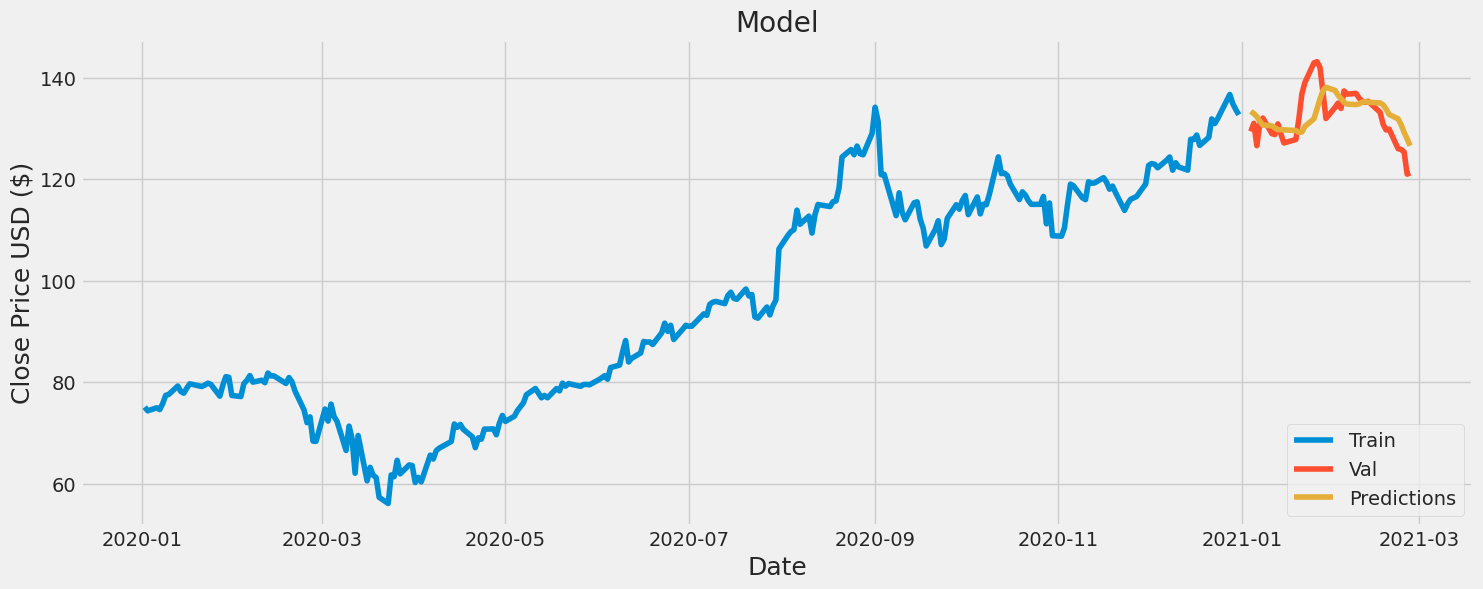

In [193]:
# Create the testing data set
test_data = scaled_features[training_data_len - sequence_length:, :]

# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, 3]  # 'Close' column as the target variable
for i in range(sequence_length, len(test_data)):
    x_test.append(test_data[i-sequence_length:i, :])  # Include all columns for the past 60 days

# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 5))  # 5 is the number of features

# Get the models predicted price values
predictions = model.predict(x_test)
predictions = target_scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
print("MAE :",metrics.mean_absolute_error(y_test, predictions))
print("RMSE :",metrics.mean_squared_error(y_test, predictions, squared=False))
print("r2 Score :", metrics.r2_score(y_test, predictions))

# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()